In [8]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import resample

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [9]:
rasp = pd.read_csv('./rasp.csv',names=['Load', 'Air_Spd'], sep=';')
eagle = pd.read_csv('./eagle.csv',names=['Gnd_Spd', 'Lat', 'Long'], sep=';')

In [10]:
load = rasp['Load'].values.reshape(-1,1)
air_spd = rasp['Air_Spd'].values.reshape(-1,1)
gnd_spd = eagle['Gnd_Spd'].values.reshape(-1,1)
gnd_spd_rs = resample(gnd_spd,len(air_spd))

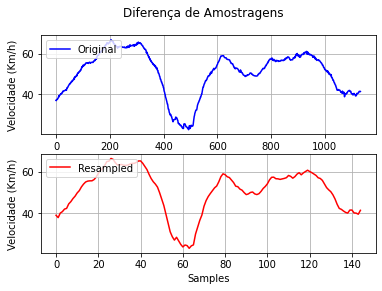

In [11]:
x1 = np.arange(0,len(gnd_spd))
fig0, (ax1, ax2) = plt.subplots(2)
fig0.suptitle('Diferença de Amostragens')
ax1.plot(x1,gnd_spd, '-b', label='Original')
ax1.set(xlabel='Samples', ylabel='Velocidade (Km/h)')
ax1.legend(loc='upper left')
ax1.grid()

x2 = np.arange(0,len(air_spd))
ax2.plot(x2,gnd_spd_rs, '-r', label='Resampled')
ax2.set(xlabel='Samples', ylabel='Velocidade (Km/h)')
ax2.legend(loc='upper left')
ax2.grid()

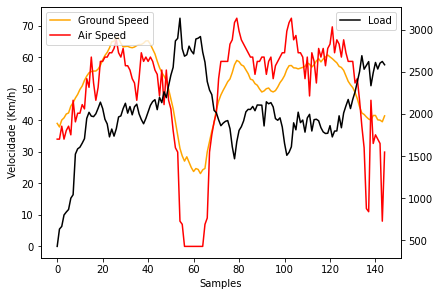

In [12]:
fig1, ax1 = plt.subplots(constrained_layout=True)
ax2 = ax1.twinx()

ax1.plot(x2, gnd_spd_rs, label='Ground Speed', color='orange')
ax1.plot(x2,air_spd,label='Air Speed', color='red')
ax1.set(xlabel='Samples', ylabel='Velocidade (Km/h)')
ax1.legend(loc='upper left')

ax2.plot(x2,load, label='Load', color='black')
ax2.legend(loc='upper right')

In [13]:
gnd_spd_df = pd.DataFrame(gnd_spd_rs, columns=['Ground Speed'])
air_spd_df = pd.DataFrame(air_spd, columns=['Air Speed'])
load_df = pd.DataFrame(load, columns=['Load'])

final_df = pd.DataFrame()
final_df['Load'] = load_df
final_df['Air Speed'] = air_spd_df
final_df['Ground Speed'] = gnd_spd_df
final_df.head()

,Load,Air Speed,Ground Speed
0,428.215990,34.02,39.015395
1,633.720893,34.02,37.886735
2,665.120979,38.13,40.071789
3,800.935780,34.02,40.764171
4,836.211451,36.76,41.989028


In [14]:
final_df.to_csv('./final_df.csv', sep=';')